# Graphlab label propagation example

In [8]:
import turicreate as gl
import pandas
import networkx as nx
#gl.canvas.set_target('ipynb')

## create SGraph

In [3]:
# setup 2 vertices with different labels
label_verts = [4,5]
labels = [0,1]

# put 2 vertices in data frame
df = pandas.DataFrame(label_verts)
df['label'] = labels

# create the graph
sg = gl.SGraph()
sg = sg.add_vertices(df, vid_field='0')

sg.vertices

__id,label
5,1
4,0


In [4]:
# add edges and the rest of the vertices
edges = [ (1,2), (1,3), (2,4), (3,4), (4,5), (5,6), (5,8), (6,7), (8,7)]
sg = sg.add_edges(pandas.DataFrame(edges), src_field='0', dst_field='1')
sg.vertices

__id,label
5,1
7,None
8,None
2,None
6,None
3,None
1,None
4,0


In [5]:
# preliminary display before label propagation
color1 = [0.522, 0.741, 0.]
color2 = [0.69, 0., 0.498]
vert_colors = { 1:color1, 7:color2,}
#sg.show(vlabel='id', vcolor=[.80,.80,.80], highlight=vert_colors)

AttributeError: 'SGraph' object has no attribute 'show'

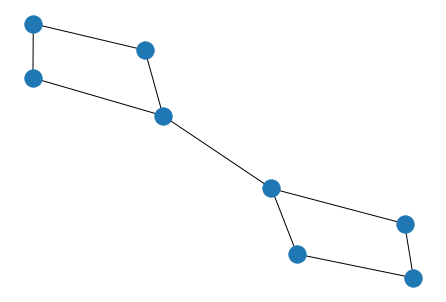

In [10]:
# convert to NetworkX graph
g = nx.Graph()
g.add_nodes_from(sg.vertices['__id'])
g.add_edges_from(sg.edges.apply(lambda row: [v for (k,v) in row.items()]))

# Draw it and show on screen
nx.draw(g)


## run label propagation

In [12]:
# use label propagation to get labels of unknown vertices
m = gl.label_propagation.create(sg, label_field='label', undirected=True)
sg_labeled = m['graph']
sg_labeled.vertices

Num classes: 2

#labeled_vertices: 2	#unlabeled_vertices: 6

+-----------+----------------------------------------+

| Iteration | Average l2 change in class probability |

+-----------+----------------------------------------+

| 1         | 0.157135                               |

| 2         | 0.104757                               |

| 3         | 0.0872971                              |

| 4         | 0.0698377                              |

| 5         | 0.0562582                              |

| 6         | 0.0452652                              |

| 7         | 0.0364277                              |

| 8         | 0.0293146                              |

| 9         | 0.0235906                              |

| 10        | 0.0189842                              |

| 11        | 0.0152773                              |

| 12        | 0.0122942                              |

| 13        | 0.00989365                             |

| 14        | 0.00796179                             |

| 15        | 0.00640715                             |

| 16        | 0.00515608                             |

| 17        | 0.00414929                             |

| 18        | 0.00333909                             |

| 19        | 0.00268709                             |

| 20        | 0.00216241                             |

| 21        | 0.00174017                             |

| 22        | 0.00140038                             |

| 23        | 0.00112694                             |

| 24        | 0.000906891                            |

+-----------+----------------------------------------+

__id,label,predicted_label,P0,P1
5,1,1,0.0,1.0
7,None,1,0.00328414277082,0.996715857229
8,None,1,0.00232223962363,0.997677760376
2,None,0,0.997677760376,0.00232223962363
6,None,1,0.00232223962363,0.997677760376
3,None,0,0.997677760376,0.00232223962363
1,None,0,0.996715857229,0.00328414277082
4,0,0,1.0,0.0


In [13]:
# find all the predicted_label==1 and put them in a list to highlight with different color
l_color = 1
sf_labeled = sg_labeled.vertices
color_filter = sf_labeled['predicted_label'] == l_color
vert_color = list(sf_labeled[color_filter]['__id'])

In [16]:
# show graph with highlighted colors and probability of being in cluster 0
m['graph'].show(vlabel='P0', highlight=vert_color)

In [ ]:
gl.canvas.set_target('ipynb')

In [17]:
sf_labeled.show()